In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (numerical with median, categorical with mode)
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert price to numeric (if not already)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

# Drop irrelevant columns (if needed)
df.drop(columns=['normalized-losses'], inplace=True, errors='ignore')

# Check dataset info
df.info()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   make               201 non-null    object 
 2   fuel-type          201 non-null    object 
 3   aspiration         201 non-null    object 
 

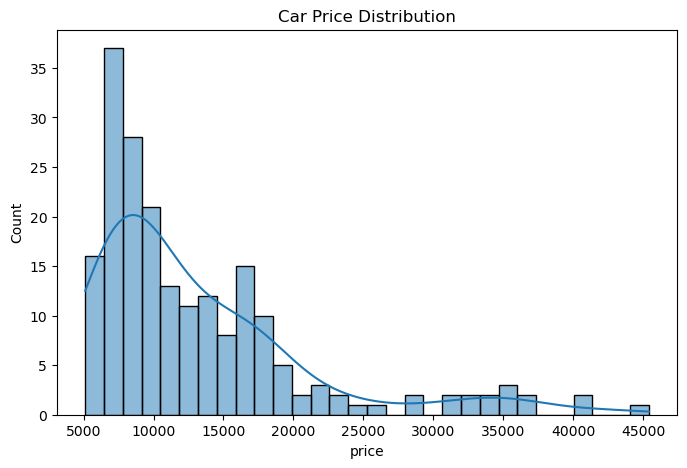

In [7]:
# Plot the distribution of car prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Car Price Distribution")
plt.show()


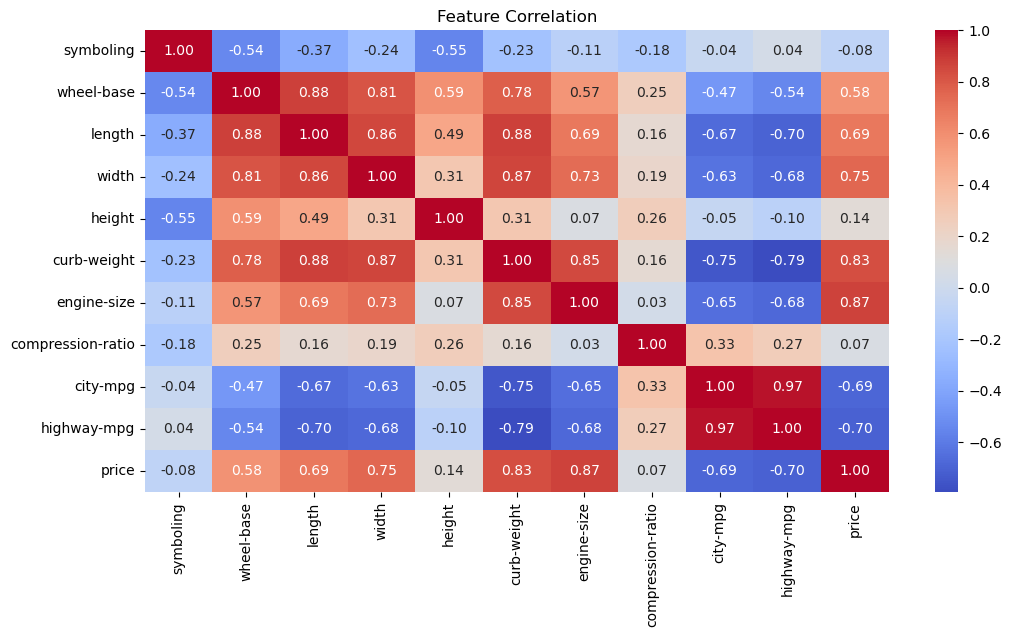

In [6]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


In [8]:
# Select features and target variable
X = df.drop(columns=['price'])  
y = df['price']

# Separate numerical and categorical columns
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train Linear Regression model
lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)

# Train Random Forest Regressor
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['symboling', 'wheel-base',
                                                   'length', 'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'compression-ratio',
                                                   'city-mpg', 'highway-mpg']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system', 'bore',
                                                   'stroke', 'horsepower',
                                                   'peak-rpm'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Linear Regression Performance:
Mean Absolute Error: 1624.35
Mean Squared Error: 5659781.87
R² Score: 0.9537


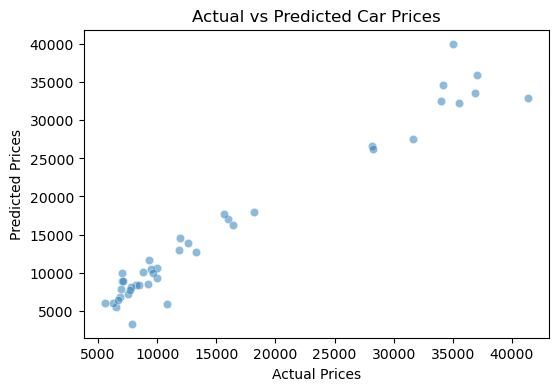

Random Forest Performance:
Mean Absolute Error: 1928.51
Mean Squared Error: 9553268.17
R² Score: 0.9219


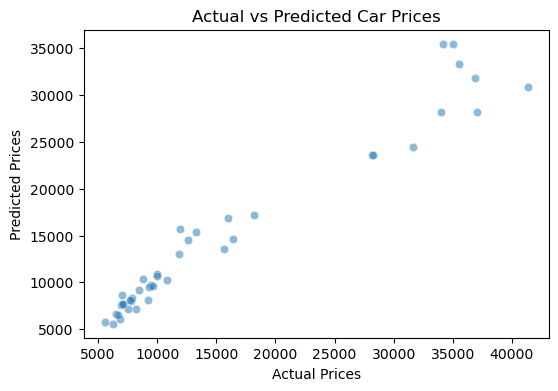

In [11]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    
    # Plot actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Car Prices")
    plt.show()

print("Linear Regression Performance:")
evaluate_model(lr_model, X_test, y_test)

print("Random Forest Performance:")
evaluate_model(rf_model, X_test, y_test)


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Transform dataset
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [16]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest with optimized parameters
rf_optimized = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=2, 
    random_state=42
)

rf_optimized.fit(X_train, y_train)

# Predictions
y_pred_rf_opt = rf_optimized.predict(X_test)

# Evaluate Model Performance
mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)

print("Optimized Random Forest Performance:")
print(f"Mean Absolute Error: {mae_rf_opt:.2f}")
print(f"Mean Squared Error: {mse_rf_opt:.2f}")
print(f"R² Score: {r2_rf_opt:.4f}")


Optimized Random Forest Performance:
Mean Absolute Error: 1846.55
Mean Squared Error: 8831227.47
R² Score: 0.9278


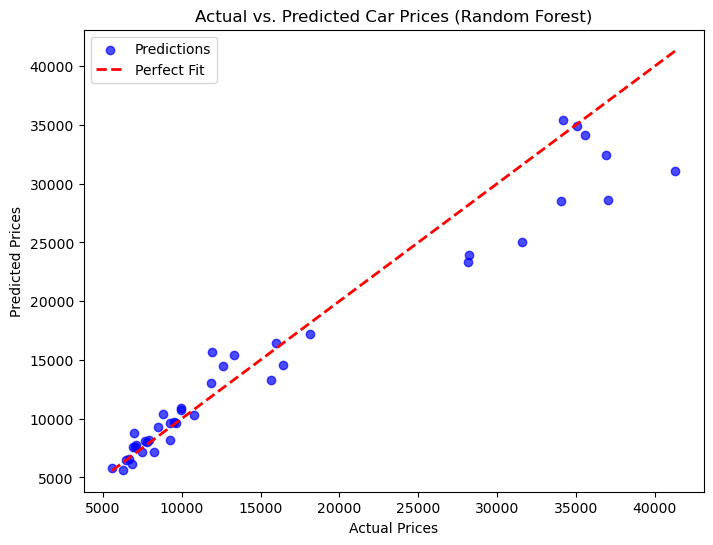

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_opt, alpha=0.7, color='blue', label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices (Random Forest)")
plt.legend()
plt.show()

In [20]:
import numpy as np

sample_data = X_test.toarray()[:1]  # Convert sparse matrix to dense and select first row
predicted_price = rf_optimized.predict(sample_data)
print(f"Predicted Car Price: ${predicted_price[0]:.2f}")


Predicted Car Price: $7138.75
